# preprosesamiento

## Importaciones necesarias

In [1]:
! pip install pillow 

In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import SRC.preprocesamiento as prep

## Variables de entorno

In [8]:
carpeta_imagenes_originales = 'data/original/'
original_train_normal =carpeta_imagenes_originales+'train/NORMAL/'
original_train_pneumonia =carpeta_imagenes_originales+'train/PNEUMONIA/'
original_test_normal =carpeta_imagenes_originales+'test/NORMAL/'
original_test_pneumonia =carpeta_imagenes_originales+'test/PNEUMONIA/'
original_val_normal =carpeta_imagenes_originales+'val/NORMAL/'
original_val_pneumonia =carpeta_imagenes_originales+'val/PNEUMONIA/'

directorios={'train_normal':original_train_normal,
              'train_pneumonia':original_train_pneumonia,
              'test_normal':original_test_normal,
              'test_pneumonia':original_test_pneumonia,
              'val_normal':original_val_normal,
              'val_pneumonia':original_val_pneumonia}

carpeta_salida_preprocesada = 'data/preprocesadas/'
salida_train_normal =carpeta_salida_preprocesada+'train/NORMAL/'
salida_train_pneumonia =carpeta_salida_preprocesada+'train/PNEUMONIA/'
salida_test_normal =carpeta_salida_preprocesada+'test/NORMAL/'
salida_test_pneumonia =carpeta_salida_preprocesada+'test/PNEUMONIA/'
salida_val_normal =carpeta_salida_preprocesada+'val/NORMAL/'
salida_val_pneumonia =carpeta_salida_preprocesada+'val/PNEUMONIA/'

## Muestra aleatoria de las imágenes originales

Se tomara aleatoriamente 3 imagenes por clase del conjunto train


### Seleccion aleatoria de imágenes

In [4]:
#display 2x3 con 3 imagenes al azar de nuemonia y 3 de normal del set de train

# Seleccionar 3 imágenes al azar de cada categoría  
normal_images = os.listdir(original_train_normal)
neumonia_images = os.listdir(original_train_pneumonia)
random_normal_images = random.sample(normal_images, 3)
random_neumonia_images = random.sample(neumonia_images, 3)



### cargar y mostrar imágenes aleatoriamente seleccionadas

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
imagenes_normal = []
imagenes_neumonia = []
for i in range(3):
    # Imagen normal (usando Pillow)
    img_path_normal = os.path.join(original_train_normal, random_normal_images[i])
    imagenes_normal.append(img_path_normal)
    with Image.open(img_path_normal) as img:
        img_normal = img.convert('L')  # convertir a escala de grises
        img_normal = np.array(img_normal)
    
    axes[i, 0].imshow(img_normal, cmap='gray')
    axes[i, 0].set_title(f'Normal: {random_normal_images[i]}')
    axes[i, 0].axis('off')
    
    # Imagen con neumonia (usando Pillow)
    img_path_neumonia = os.path.join(original_train_pneumonia, random_neumonia_images[i])
    imagenes_neumonia.append(img_path_neumonia)
    with Image.open(img_path_neumonia) as img:
        img_neumonia = img.convert('L')
        img_neumonia = np.array(img_neumonia)
    axes[i, 1].imshow(img_neumonia, cmap='gray')
    axes[i, 1].set_title(f'Neumonia: {random_neumonia_images[i]}')
    axes[i, 1].axis('off')
    
plt.suptitle('Imágenes de entrenamiento: Normal vs Neumonia', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


KeyboardInterrupt: 

In [ ]:
print("Rutas de imágenes normales seleccionadas:")
for ruta in imagenes_normal:
    print(ruta)
print("\nRutas de imágenes con neumonía seleccionadas:")
for ruta in imagenes_neumonia:
    print(ruta)

Rutas de imágenes normales seleccionadas:
data/original/train/NORMAL/IM-0648-0001.jpeg
data/original/train/NORMAL/IM-0467-0001-0002.jpeg
data/original/train/NORMAL/NORMAL2-IM-0535-0001-0002.jpeg

Rutas de imágenes con neumonía seleccionadas:
data/original/train/PNEUMONIA/person1253_virus_2129.jpeg
data/original/train/PNEUMONIA/person1563_bacteria_4092.jpeg
data/original/train/PNEUMONIA/person841_virus_1481.jpeg


## normalizacion de tamaño de imagenes

Dados los diferentes tamaños de las imagenes originales, y que son imagenes en las que buscamos las menores perdidas de informacion posible, por ser imagenes medicas, se opta por redimensionar las imagenes a un tamaño comun de 512x512 pixeles, que es un tamaño intermedio entre las diferentes resoluciones de las imagenes originales.

In [ ]:
#cargar las imagenes seleccionadas para preprocesamiento
imagenes_cargadas_normal = [Image.open(ruta) for ruta in imagenes_normal]
imagenes_cargadas_neumonia = [Image.open(ruta) for ruta in imagenes_neumonia]

In [ ]:
#normalizacion de tamaño de imagenes
imagenes_normalizadas_normal = [prep.normalizar_tamano(imagen) for imagen in imagenes_cargadas_normal]
imagenes_normalizadas_neumonia = [prep.normalizar_tamano(imagen) for imagen in imagenes_cargadas_neumonia]

In [ ]:
#tabla tamaños imagenes normalizadas vs originales

rows = []
for ruta in imagenes_normal + imagenes_neumonia:
    try:
        with Image.open(ruta) as img:
            ancho_ori, alto_ori = img.size
    except Exception as e:
        print(f'Error abriendo {ruta}: {e}')
        continue
    try:
        with Image.open(ruta) as img_for_norm:
            img_norm = prep.normalizar_tamano(img_for_norm)
            ancho_norm, alto_norm = img_norm.size
    except Exception as e:
        print(f'Error normalizando {ruta}: {e}')
        ancho_norm, alto_norm = (None, None)
    parts = os.path.normpath(ruta).split(os.path.sep)
    if 'NORMAL' in parts:
        clase = 'NORMAL'
    elif 'PNEUMONIA' in parts:
        clase = 'PNEUMONIA'
    else:
        clase = ''
    rows.append({"ruta": ruta, "clase": clase, "original_size": f'{ancho_ori}x{alto_ori}', "normalized_size": f'{ancho_norm}x{alto_norm}', "original_width": ancho_ori, "original_height": alto_ori, "normalized_width": ancho_norm, "normalized_height": alto_norm})

tabla = pd.DataFrame(rows)
# Mostrar la tabla en el notebook
display(tabla)

# Guardar resultado en CSV dentro de `results/`
os.makedirs('results', exist_ok=True)
tabla.to_csv('results/tabla_tamanos_imagenes.csv', index=False)
print('Tabla guardada en results/tabla_tamanos_imagenes.csv')

# Mostrar resumen estadístico por clase
display(tabla.groupby('clase')[['original_width','original_height','normalized_width','normalized_height']].agg(['mean','min','max']))

,ruta,clase,original_size,normalized_size,original_width,original_height,normalized_width,normalized_height
0,data/original/train/NORMAL/IM-0648-0001.jpeg,NORMAL,1604x1279,512x512,1604,1279,512,512
1,data/original/train/NORMAL/IM-0467-0001-0002.jpeg,NORMAL,1634x1372,512x512,1634,1372,512,512
2,data/original/train/NORMAL/NORMAL2-IM-0535-000...,NORMAL,1192x862,512x512,1192,862,512,512
3,data/original/train/PNEUMONIA/person1253_virus...,PNEUMONIA,1064x632,512x512,1064,632,512,512
4,data/original/train/PNEUMONIA/person1563_bacte...,PNEUMONIA,1272x872,512x512,1272,872,512,512
5,data/original/train/PNEUMONIA/person841_virus_...,PNEUMONIA,1284x878,512x512,1284,878,512,512


Tabla guardada en results/tabla_tamanos_imagenes.csv


original_width             original_height             \
                    mean   min   max            mean  min   max   
clase                                                             
NORMAL       1476.666667  1192  1634          1171.0  862  1372   
PNEUMONIA    1206.666667  1064  1284           794.0  632   878   

          normalized_width           normalized_height            
                      mean  min  max              mean  min  max  
clase                                                             
NORMAL               512.0  512  512             512.0  512  512  
PNEUMONIA            512.0  512  512             512.0  512  512

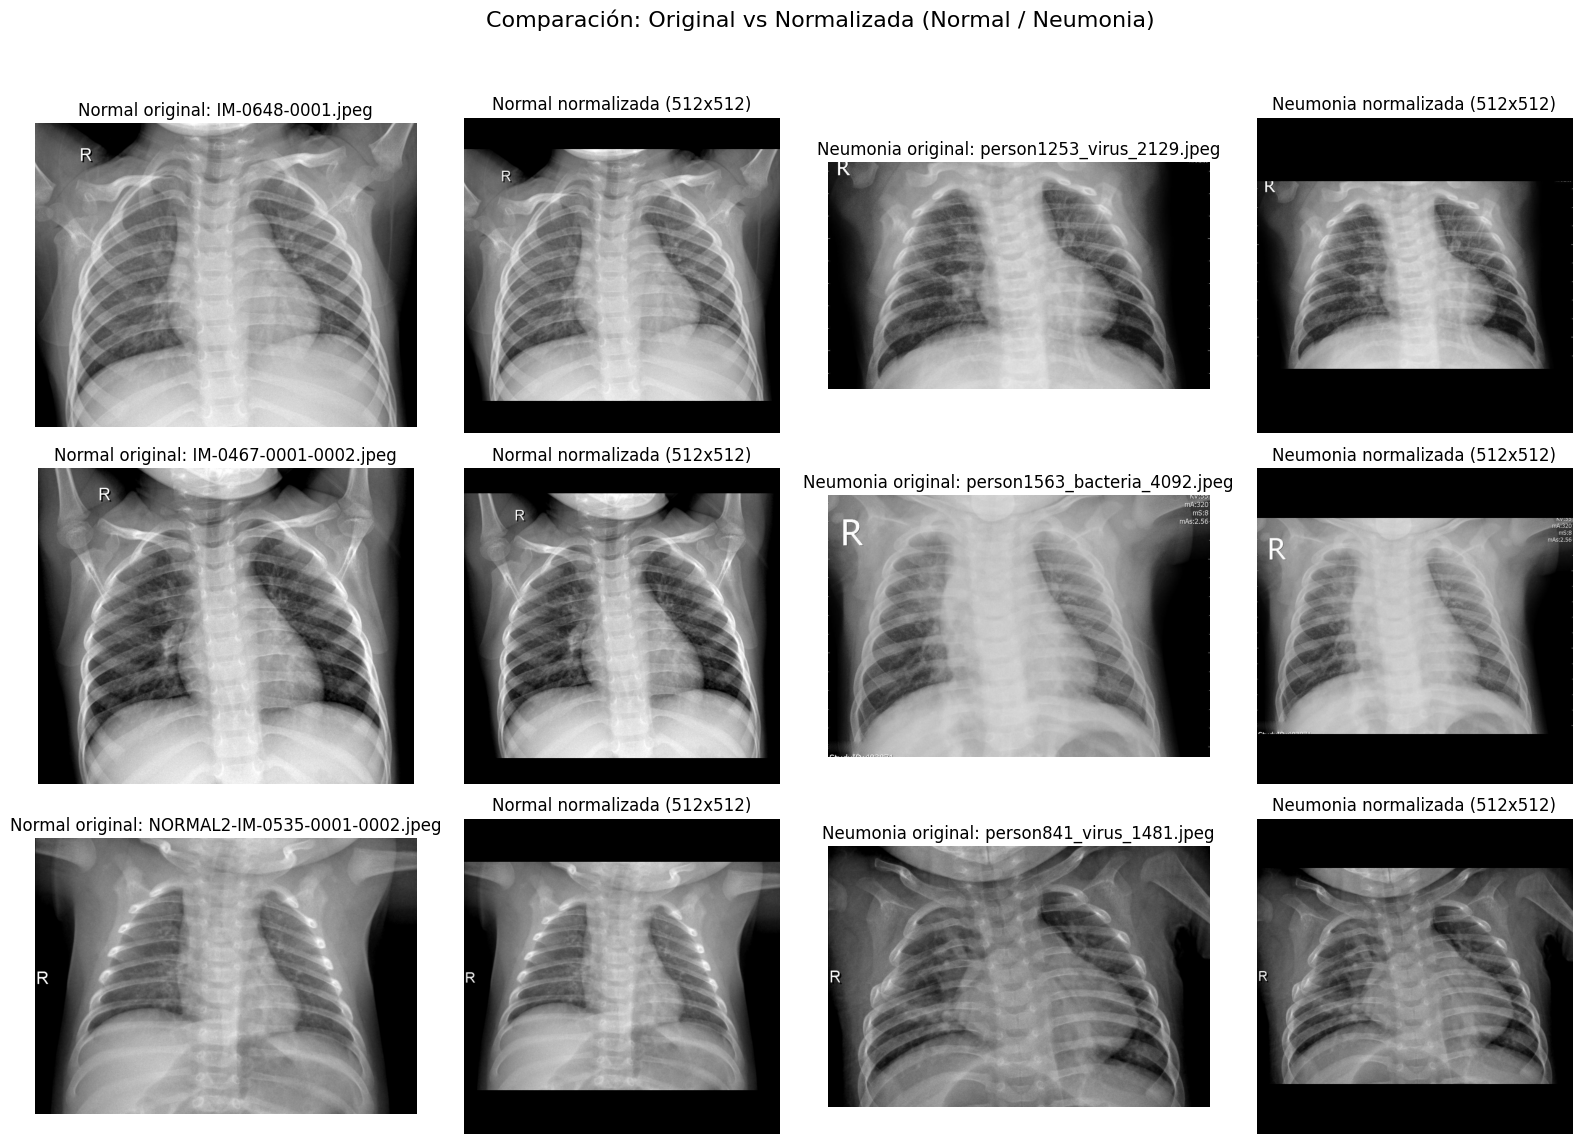

In [ ]:
#mostrar  imagenes normalizadas vs originales
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i in range(3):
    # Normal - original
    ruta_orig_norm = imagenes_normal[i]
    with Image.open(ruta_orig_norm) as img_o:
        img_o_arr = np.array(img_o.convert('L'))
    axes[i, 0].imshow(img_o_arr, cmap='gray')
    axes[i, 0].set_title(f'Normal original: {os.path.basename(ruta_orig_norm)}')
    axes[i, 0].axis('off')

    # Normal - normalized
    with Image.open(ruta_orig_norm) as img_for_norm:
        img_norm = prep.normalizar_tamano(img_for_norm)
        img_norm_arr = np.array(img_norm.convert('L'))
    axes[i, 1].imshow(img_norm_arr, cmap='gray')
    axes[i, 1].set_title('Normal normalizada (512x512)')
    axes[i, 1].axis('off')

    # Pneumonia - original
    ruta_orig_pneu = imagenes_neumonia[i]
    with Image.open(ruta_orig_pneu) as img_p_o:
        img_p_o_arr = np.array(img_p_o.convert('L'))
    axes[i, 2].imshow(img_p_o_arr, cmap='gray')
    axes[i, 2].set_title(f'Neumonia original: {os.path.basename(ruta_orig_pneu)}')
    axes[i, 2].axis('off')

    # Pneumonia - normalized
    with Image.open(ruta_orig_pneu) as img_p_for_norm:
        img_p_norm = prep.normalizar_tamano(img_p_for_norm)
        img_p_norm_arr = np.array(img_p_norm.convert('L'))
    axes[i, 3].imshow(img_p_norm_arr, cmap='gray')
    axes[i, 3].set_title('Neumonia normalizada (512x512)')
    axes[i, 3].axis('off')

plt.suptitle('Comparación: Original vs Normalizada (Normal / Neumonia)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## normalizacion de intensidad de pixeles

se aplicara una normalizacion de intensidad min-max a las imagenes, dado que esta tecnica es recomendada para imagenes medicas, y que ademas mejora el contraste de las imagenes, lo que puede ayudar a mejorar el rendimiento del modelo, esto segun la revision relizada.

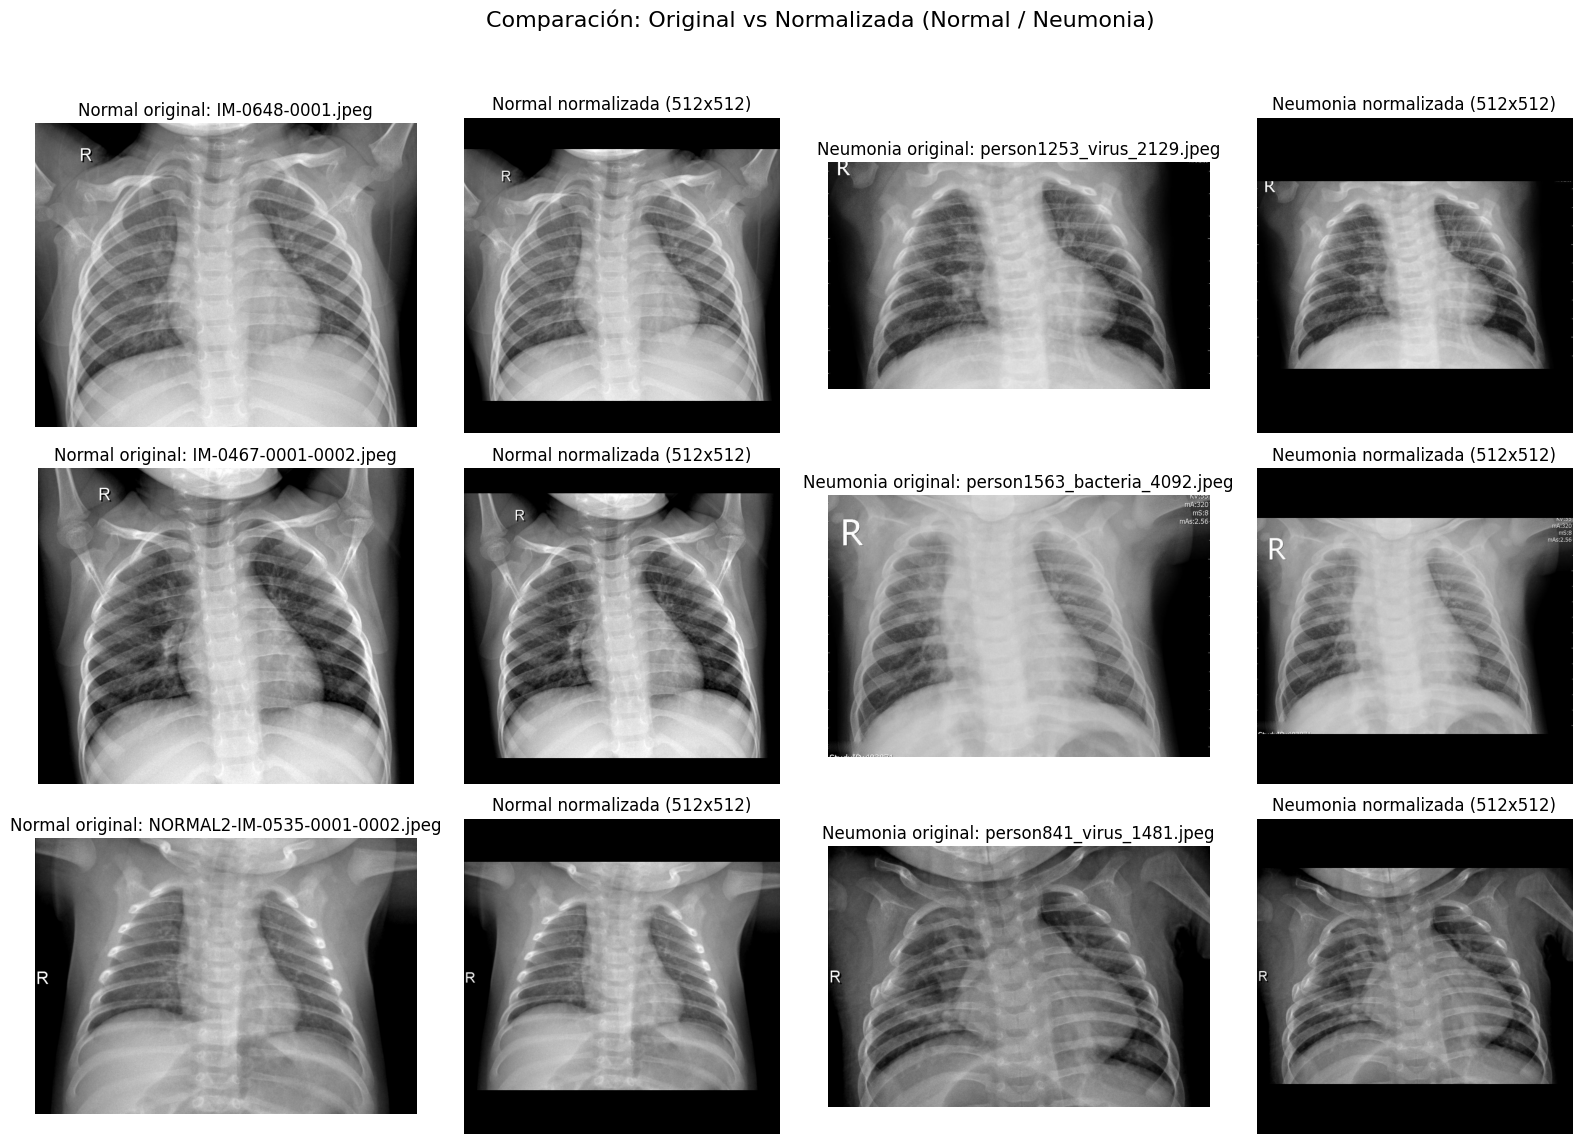

In [ ]:
#mostrar  imagenes normalizadas vs originales
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for i in range(3):
    # Normal - original
    ruta_orig_norm = imagenes_normal[i]
    with Image.open(ruta_orig_norm) as img_o:
        img_o_arr = np.array(img_o.convert('L'))
    axes[i, 0].imshow(img_o_arr, cmap='gray')
    axes[i, 0].set_title(f'Normal original: {os.path.basename(ruta_orig_norm)}')
    axes[i, 0].axis('off')

    # Normal - normalized
    with Image.open(ruta_orig_norm) as img_for_norm:
        img_norm = prep.normalizar_tamano(img_for_norm)
        img_norm = prep.normalizacion_min_max(img_norm)
        img_norm_arr = np.array(img_norm.convert('L'))
    axes[i, 1].imshow(img_norm_arr, cmap='gray')
    axes[i, 1].set_title('Normal normalizada (512x512)')
    axes[i, 1].axis('off')

    # Pneumonia - original
    ruta_orig_pneu = imagenes_neumonia[i]
    with Image.open(ruta_orig_pneu) as img_p_o:
        img_p_o_arr = np.array(img_p_o.convert('L'))
    axes[i, 2].imshow(img_p_o_arr, cmap='gray')
    axes[i, 2].set_title(f'Neumonia original: {os.path.basename(ruta_orig_pneu)}')
    axes[i, 2].axis('off')

    # Pneumonia - normalized
    with Image.open(ruta_orig_pneu) as img_p_for_norm:
        img_p_norm = prep.normalizar_tamano(img_p_for_norm)
        img_p_norm = prep.normalizacion_min_max(img_p_norm)
        img_p_norm_arr = np.array(img_p_norm.convert('L'))
    axes[i, 3].imshow(img_p_norm_arr, cmap='gray')
    axes[i, 3].set_title('Neumonia normalizada (512x512)')
    axes[i, 3].axis('off')

plt.suptitle('Comparación: Original vs Normalizada (Normal / Neumonia)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Aplicar a todas las imagenes del dataset y guardar en nuevas carpetas
Se aplicara el preprocesamiento a todas las imagenes del dataset y se guardaran en nuevas carpetas para su posterior uso en la etapa de extraccion de caracteristicas.

In [ ]:
#validacion normal
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_val_normal = [f for f in os.listdir(original_val_normal) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_val_normal, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_val_normal:
    ruta_completa = os.path.join(original_val_normal, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_val_normal, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

In [10]:
#validacion neumonia
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_val_pneumonia = [f for f in os.listdir(original_val_pneumonia) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_val_pneumonia, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_val_pneumonia:
    ruta_completa = os.path.join(original_val_pneumonia, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_val_pneumonia, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

In [11]:
#train normal
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_train_normal = [f for f in os.listdir(original_train_normal) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_train_normal, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_train_normal:
    ruta_completa = os.path.join(original_train_normal, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_train_normal, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

In [12]:
# train neumonia
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_train_pneumonia = [f for f in os.listdir(original_train_pneumonia) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_train_pneumonia, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_train_pneumonia:
    ruta_completa = os.path.join(original_train_pneumonia, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_train_pneumonia, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

In [13]:
#test normal
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_test_normal = [f for f in os.listdir(original_test_normal) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_test_normal, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_test_normal:
    ruta_completa = os.path.join(original_test_normal, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_test_normal, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

In [14]:
# test neumonia
## extraer rutas de imagenes, asegurandonos de que son solo imagenes
rutas_test_neumonia = [f for f in os.listdir(original_test_pneumonia) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
# Asegurar que la carpeta de salida exista
os.makedirs(salida_test_pneumonia, exist_ok=True)
# recorremos la lista de imagenes y aplicamos el preprocesamiento guardando en la carpeta de salida
for nombre_imagen in rutas_test_neumonia:
    ruta_completa = os.path.join(original_test_pneumonia, nombre_imagen)
    try:
        with Image.open(ruta_completa) as img:
            img_preprocesada = prep.preprocesar_imagen(img)
            salida_path = os.path.join(salida_test_pneumonia, nombre_imagen)
            img_preprocesada.save(salida_path)
    except Exception as e:
        print(f'Error procesando {ruta_completa}: {e}')

## DataAugmentation para aumentar dataset y nivelar clases